In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import scipy
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
sample=pd.read_excel("D:/project/.venv/Industrial_copper_modeling/Copper_set.xlsx")
sample.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
sample.shape

(181673, 14)

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
sample.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [8]:
sample.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [21]:
sample.drop(columns=["id","material_ref"],inplace=True)


In [9]:
sample.isnull().sum()

item_date         2
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     2
selling_price     8
dtype: int64

In [10]:
sample.shape

(181673, 12)

In [11]:
sample.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [12]:
sample

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-01-01,854.00
1,2021-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-01-01,1047.00
2,2021-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-01-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-01-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-01-01,591.00
181669,2020-01-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-01-01,589.00
181670,2020-01-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-01-01,619.00
181671,2020-01-02,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-01-01,601.00


In [13]:
sample.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [22]:
sample['item_date']=pd.to_datetime(sample['item_date'],format='%Y%M%d',errors='coerce').dt.date
sample['quantity tons']=pd.to_numeric(sample['quantity tons'],errors='coerce')
sample['customer']=pd.to_numeric(sample['customer'],errors='coerce')
sample['country']=pd.to_numeric(sample['country'],errors='coerce')
sample['application']=pd.to_numeric(sample['application'],errors='coerce')
sample['thickness']=pd.to_numeric(sample['thickness'],errors='coerce')
sample['width']=pd.to_numeric(sample['width'],errors='coerce')
sample['product_ref']=pd.to_numeric(sample['product_ref'],errors='coerce')
sample['delivery date']=pd.to_datetime(sample['delivery date'],format='%Y%M%d',errors='coerce').dt.date
sample['selling_price']=pd.to_numeric(sample['selling_price'],errors='coerce')

In [15]:
sample.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [23]:
#converting the negative values into the null values
sample["quantity tons"]= sample["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
sample["selling_price"]= sample["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [50]:
sample["quantity tons"].min(),sample["quantity tons"].min()

(1e-05, 1e-05)

In [7]:
sample.isnull().sum()

id                   2
item_date            2
quantity tons        5
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        2
selling_price        8
dtype: int64

In [24]:
sample["status"].fillna(sample["status"].mode().iloc[0],inplace=True)
sample["item_date"]. fillna(sample["item_date"].mode().iloc[0],inplace=True)
sample["delivery date"]. fillna(sample["delivery date"].mode().iloc[0],inplace=True)

In [25]:
sample["quantity tons"].fillna(sample["quantity tons"].median(),inplace=True)
sample["customer"].fillna(sample["customer"].median(),inplace=True)
sample["country"].fillna(sample["country"].median(),inplace=True)
sample["application"].fillna(sample["application"].median(),inplace=True)
sample["thickness"].fillna(sample["thickness"].median(),inplace=True)
sample["selling_price"].fillna(sample["selling_price"].median(),inplace=True)

In [21]:
sample.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [26]:
sample_1=sample.copy()

In [18]:
sample_1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-01-01,854.00
1,2021-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-01-01,1047.00
2,2021-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-01-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-01-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-01-01,591.00
181669,2020-01-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-01-01,589.00
181670,2020-01-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-01-01,619.00
181671,2020-01-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-01-01,601.00


C:\Users\halee\AppData\Local\Temp\ipykernel_4128\2745190330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


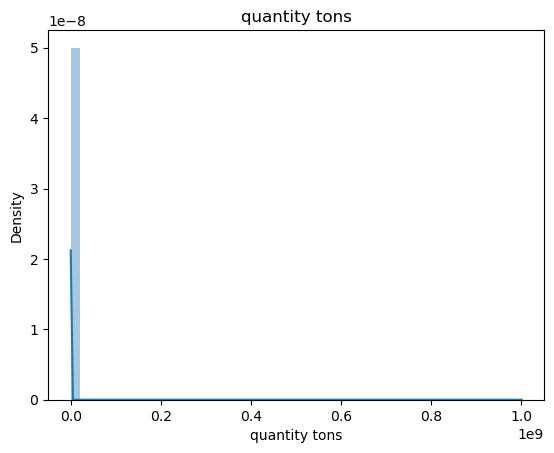

C:\Users\halee\AppData\Local\Temp\ipykernel_4128\2745190330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


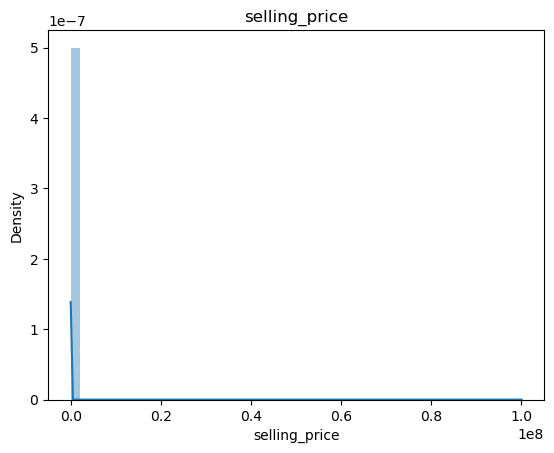

C:\Users\halee\AppData\Local\Temp\ipykernel_4128\2745190330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


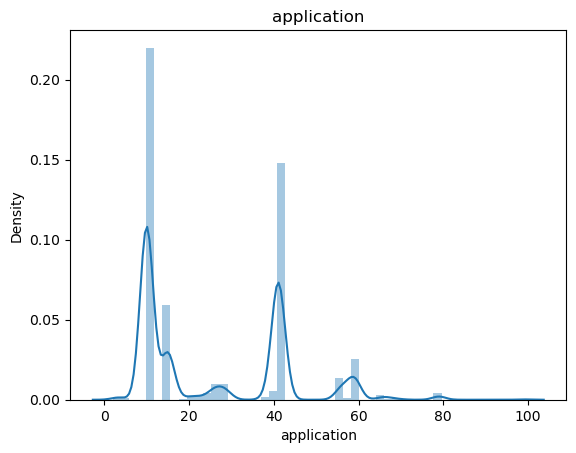

C:\Users\halee\AppData\Local\Temp\ipykernel_4128\2745190330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


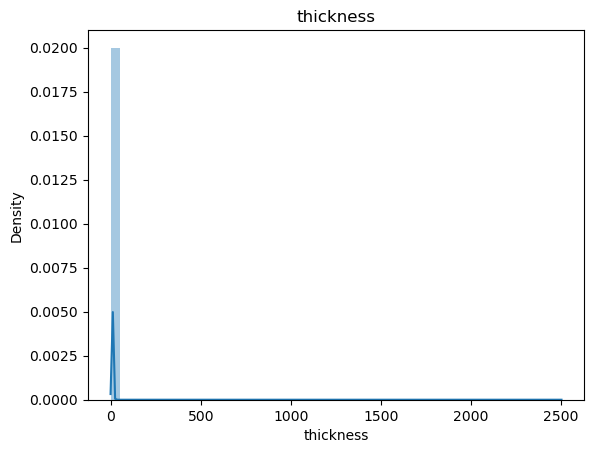

C:\Users\halee\AppData\Local\Temp\ipykernel_4128\2745190330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


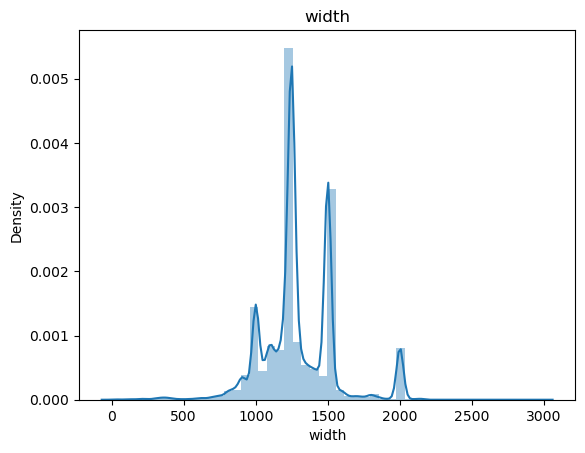

C:\Users\halee\AppData\Local\Temp\ipykernel_4128\2745190330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


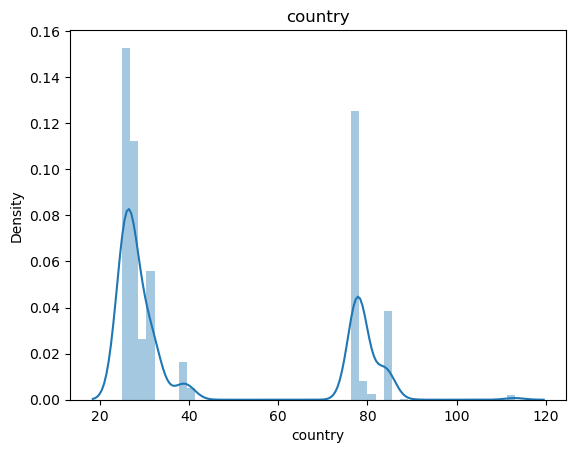

In [24]:
a=['quantity tons','selling_price','application','thickness','width', 'country']
for i in a:
    sns.distplot(sample_1[i])
    plt.title(i)
    plt.show()

# finding skewness value

In [26]:
sk_value_1=scipy.stats.skew(sample_1['quantity tons'], axis=0, bias=True)
sk_value_1

424.68730994731504

In [27]:
sk_value_2=scipy.stats.skew(sample_1['application'], axis=0, bias=True)
sk_value_2

0.7245583983073829

In [28]:
sk_value_3=scipy.stats.skew(sample_1['thickness'], axis=0, bias=True)
sk_value_3

303.4450657126513

In [29]:
sk_value_4=scipy.stats.skew(sample_1['width'], axis=0, bias=True)
sk_value_4

0.37459367901082125

In [30]:
sk_value_5=scipy.stats.skew(sample_1['selling_price'], axis=0, bias=True)
sk_value_5

301.38559971625915

In [27]:
#Log transformation

sample_1["quantity_tons_log"]= np.log(sample_1["quantity tons"])
sample_1["selling_price_log"]= np.log(sample_1["selling_price"])
sample_1["thickness_log"]= np.log(sample_1["thickness"])

C:\Users\halee\AppData\Local\Temp\ipykernel_15088\414488142.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


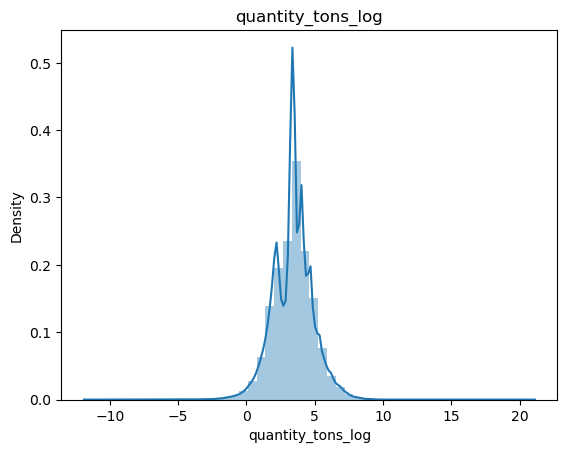

C:\Users\halee\AppData\Local\Temp\ipykernel_15088\414488142.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


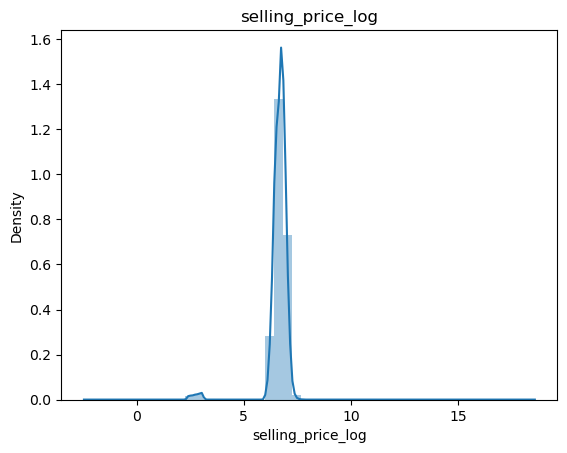

C:\Users\halee\AppData\Local\Temp\ipykernel_15088\414488142.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_1[i])


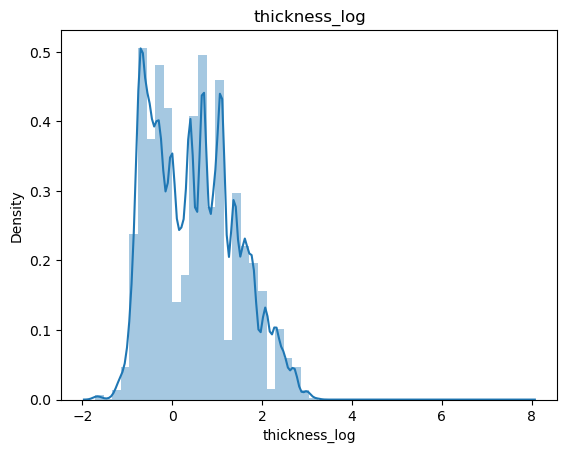

In [14]:
b=["quantity_tons_log","selling_price_log","thickness_log"]
for i in b:
    sns.distplot(sample_1[i])
    plt.title(i)
    plt.show()

#Outliner detection

In [33]:
def outlier(sample_1,column):
  q1= sample_1[column].quantile(0.25)
  q3= sample_1[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  return upper_threshold,lower_threshold

In [34]:
column= ['quantity_tons_log', 'thickness_log','selling_price_log','width','application']
for i in column:
     print(outlier(sample_1,i))

(6.9247343237411325, -0.3223343794492468)
(3.281543137578373, -2.5396057928489957)
(7.390361168943161, 5.9750377948392694)
(1980.0, 700.0)
(87.5, -36.5)


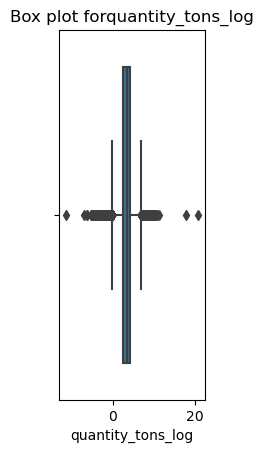

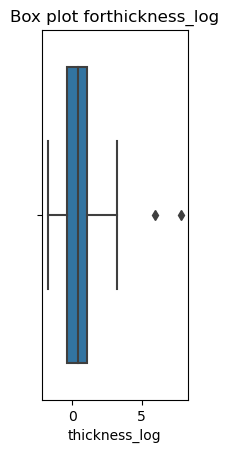

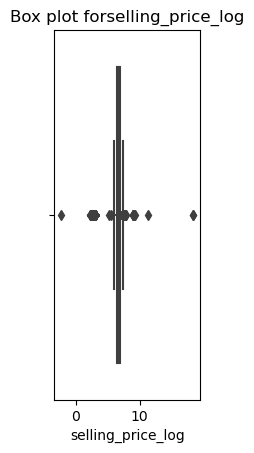

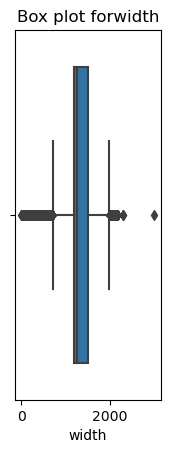

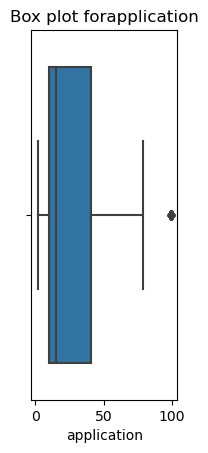

In [35]:
for i in column:
    plt.subplot(1,3,3)
    sns.boxplot(x=sample_1[i])
    plt.title("Box plot for" + i)
    plt.show()

<Axes: >

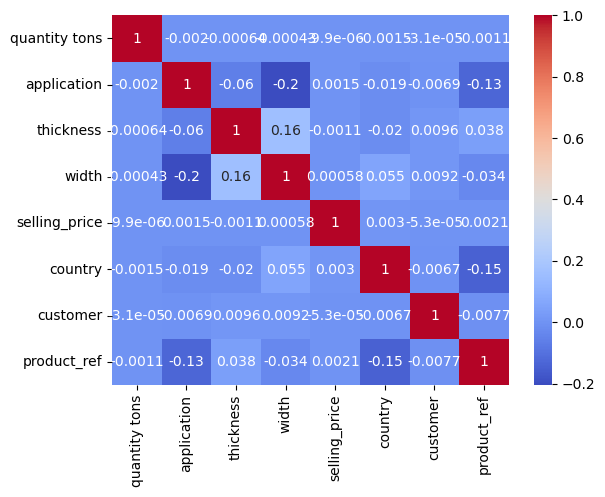

In [36]:
x=sample_1[['quantity tons','application','thickness','width','selling_price','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="coolwarm")

In [21]:
#encoding the data
sample_1['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [28]:
encode_1=OneHotEncoder(handle_unknown='ignore')
encode_1.fit_transform(sample_1[['status']])


<181673x9 sparse matrix of type '<class 'numpy.float64'>'
	with 181673 stored elements in Compressed Sparse Row format>

In [29]:
status_encode=encode_1.fit_transform(sample_1[['status']]).toarray()
status_encode

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [127]:
#status_encode=OneHotEncoder(handle_unknown='ignore').fit_transform(sample_1[['status']]).toarray()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [24]:
sample_1['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [129]:
#sample_1["status"]= sample_1["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                #'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
#sample_1['status'].unique()

In [25]:
sample_1['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [30]:
encode_3=LabelEncoder()
encode_3.fit_transform(sample_1[['item type']])
item_s_encode=encode_3.fit_transform(sample_1[['item type']])
item_s_encode


c:\Users\halee\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\halee\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5, 5, 6, ..., 5, 5, 5])

In [26]:
#sample_1['item type']=LabelEncoder().fit_transform(sample_1[['item type']])

In [31]:
encode_2=OneHotEncoder(handle_unknown='ignore')
encode_2.fit_transform(sample_1[['item type']])

<181673x7 sparse matrix of type '<class 'numpy.float64'>'
	with 181673 stored elements in Compressed Sparse Row format>

In [32]:
itemtype_encode=encode_2.fit_transform(sample_1[['item type']]).toarray()

In [ ]:
#itemtype_enco=OneHotEncoder(handle_unknown='ignore').fit_transform(sample_1[['item type']]).toarray()

In [29]:
sample_1['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [84]:
sample_1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity_tons_log',
       'selling_price_log', 'thickness_log'],
      dtype='object')

In [134]:
sample_1.drop(columns=["selling_price","thickness",'quantity tons'],inplace=True)

In [47]:
sample_1['country'].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [252]:
sample_1['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [253]:
sample_1['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [33]:
X=np.concatenate((sample_1[['quantity_tons_log','application','thickness_log','width','country','customer','product_ref']].values,status_encode,itemtype_encode),axis=1)
Y=sample_1['selling_price_log']

In [40]:
itemtype_encode

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
status_encode.shape

(181673, 9)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
X_train.shape

(127171, 23)

In [ ]:
def model_accuracy(sample_1,algorithm):
    X=sample_1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
    Y=sample_1['selling_price_log']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model=algorithm().fit(X_train, Y_train)
    
    Y_pred_train=best_model.predict(X_train)
    Y_pred_test=best_model.predict(X_test)
    
    r2_train=r2_score(Y_train, Y_pred_train)
    r2_test=r2_score(Y_test, Y_pred_test)

    mse=mean_squared_error(Y_test,Y_pred_test)

    result={"Algorithm":algorithm.__name__,
            "R2_Train":r2_train,
            "R2_Test":r2_test,
            "Mean Sqr":mse}
    
    return result

In [90]:
print(model_accuracy(sample_1, DecisionTreeRegressor))
print(model_accuracy(sample_1, RandomForestRegressor))
print(model_accuracy(sample_1, ExtraTreesRegressor))

c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\halee\anaconda3\Lib\site-packag

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9324486120666927, 'R2_Test': 0.9076611141295043, 'Best hyperparameter': {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}}


In [91]:
print(model_accuracy(sample_1, RandomForestRegressor))

c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\halee\anaconda3\Lib\site-packag

{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9375219543187258, 'R2_Test': 0.9138788601497003, 'Best hyperparameter': {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}}


In [92]:
print(model_accuracy(sample_1, ExtraTreesRegressor))

c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\halee\anaconda3\Lib\site-packag

{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9416499316100957, 'R2_Test': 0.905737020390841, 'Best hyperparameter': {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}}


In [96]:
X=sample_1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
Y=sample_1['selling_price_log']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
param_grid  = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
model=DecisionTreeRegressor()

Grid_Search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5 )
Grid_Search.fit( X_train, Y_train)
best_model=Grid_Search.best_estimator_

Y_pred_train=best_model.predict(X_train)
Y_pred_test=best_model.predict(X_test)

r2_train=r2_score(Y_train, Y_pred_train)
r2_test=r2_score(Y_test, Y_pred_test)

print("Algorithm",model)
print("R2_Train",r2_train)
print( "R2_Test",r2_test)
print("Best hyperparameter",Grid_Search.best_params_)

c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\halee\anaconda3\Lib\site-packag

Algorithm DecisionTreeRegressor()
R2_Train 0.9445281581435407
R2_Test 0.8938972210651606
Best hyperparameter {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [1]:
def model_accuracy(sample_1,algorithm):
    X=sample_1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
    Y=sample_1['selling_price_log']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
    model=algorithm().fit(X_train, Y_train)
    
    Y_pred_train=model.predict(X_train)
    Y_pred_test=model.predict(X_test)
    
    r2_train=r2_score(Y_train, Y_pred_train)
    r2_test=r2_score(Y_test, Y_pred_test)

    mse=mean_squared_error(Y_test,Y_pred_test)

    result={"Algorithm":algorithm.__name__,
            "R2_Train":r2_train,
            "R2_Test":r2_test,
            "Mean Sqr":mse}
    
    return result


In [ ]:
print(model_accuracy(sample_1,DecisionTreeRegressor))
print(model_accuracy(sample_1,ExtraTreesRegressor))
print(model_accuracy(sample_1,RandomForestRegressor))


In [156]:
sample_1.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_tons_log,selling_price_log,thickness_log
0,2021-01-01,30156308.0,28.0,1,5,10.0,1500.0,1670798778,2021-01-01,3.991779,6.749931,0.693147
1,2021-01-01,30202938.0,25.0,1,5,41.0,1210.0,1668701718,2021-01-01,6.643822,6.953684,-0.223144
2,2021-01-01,30153963.0,30.0,1,6,28.0,952.0,628377,2021-01-01,5.956169,6.468211,-0.967584
3,2021-01-01,30349574.0,32.0,1,3,59.0,1317.0,1668701718,2021-01-01,5.310301,6.643790,0.832909
4,2021-01-01,30211560.0,28.0,1,5,10.0,2000.0,640665,2021-01-01,6.666354,6.357842,1.386294


In [30]:
def acc(status_encode,itemtype_encode,algorithm): 
    X=np.concatenate((sample_1[['quantity_tons_log','application','thickness_log','width','country','customer','product_ref']].values,status_encode,itemtype_encode),axis=1)
    Y=sample_1['selling_price_log']
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model=algorithm().fit(X_train, Y_train)
        
    Y_pred_train=model.predict(X_train)
    Y_pred_test=model.predict(X_test)

    r2_train=r2_score(Y_train, Y_pred_train)
    r2_test=r2_score(Y_test, Y_pred_test)
    mse=mean_squared_error(Y_test,Y_pred_test)

    result={"Algorithm":algorithm.__name__,
                "R2_Train":r2_train,
                "R2_Test":r2_test,
                "Mean Sqr":mse}
        
    return result


In [31]:
print(acc(status_encode,itemtype_encode,DecisionTreeRegressor))
print(acc(status_encode,itemtype_encode,ExtraTreesRegressor))
print(acc(status_encode,itemtype_encode,RandomForestRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 1.0, 'R2_Test': 0.891445006988197, 'Mean Sqr': 0.03381559496946451}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 1.0, 'R2_Test': 0.9202423117345957, 'Mean Sqr': 0.024845044960672386}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9897562394904462, 'R2_Test': 0.9336034839324492, 'Mean Sqr': 0.02068295186090354}


In [32]:
X=np.concatenate((sample_1[['quantity_tons_log','application','thickness_log','width','country','customer','product_ref']].values,status_encode,itemtype_encode),axis=1)
Y=sample_1['selling_price_log']
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model=RandomForestRegressor().fit(X_train, Y_train)
        
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)


In [34]:
with open("price_model_pkl","wb") as files:
  pickle.dump(model, files)

with open("pstatus_pkl","wb") as files:
  pickle.dump(status_encode, files)

with open("pitem_pkl","wb") as files:
  pickle.dump(itemtype_encode, files)

# import pickle
#with open("price_model_pkl","rb") as files:
  #best_model=pickle.load(files)

In [158]:
sell=model.predict([[5,2,4,11,0.1,1200,24,30211560,628377]])
sell

c:\Users\halee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.83550273])

In [96]:
sample_2=sample_1.copy()

In [97]:
sample_2.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity_tons_log,selling_price_log,thickness_log
0,2021-01-01,30156308.0,28.0,0.0,0.0,10.0,1500.0,1670798778,2021-01-01,3.991779,6.749931,0.693147
1,2021-01-01,30202938.0,25.0,0.0,0.0,41.0,1210.0,1668701718,2021-01-01,6.643822,6.953684,-0.223144
2,2021-01-01,30153963.0,30.0,0.0,0.0,28.0,952.0,628377,2021-01-01,5.956169,6.468211,-0.967584
3,2021-01-01,30349574.0,32.0,0.0,0.0,59.0,1317.0,1668701718,2021-01-01,5.310301,6.643790,0.832909
4,2021-01-01,30211560.0,28.0,0.0,0.0,10.0,2000.0,640665,2021-01-01,6.666354,6.357842,1.386294


In [265]:
sample_2.status.value_counts()

status
0.0    178533
1.0      3140
Name: count, dtype: int64

In [244]:
sample_1['status'].nunique

<bound method IndexOpsMixin.nunique of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
181668    0.0
181669    0.0
181670    0.0
181671    0.0
181672    0.0
Name: status, Length: 181673, dtype: float64>

In [45]:
sample_1['quantity_tons_log'].min(),sample_1['quantity_tons_log'].max()

(-11.512925464970229, 20.72326583694641)

In [52]:
sample_1['width'].min(),sample_1['width'].max()

(1.0, 2990.0)

In [ ]:
sample_1['thickness_log'].min(),sample_1['thickness_log'].max()

In [38]:
def model_acc(item_s_encode,itemtype_encode,algorithm): 
    X=np.concatenate((sample_1[['quantity_tons_log','application','thickness_log','width','country','customer','product_ref']].values,itemtype_encode),axis=1)
    Y=item_s_encode
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model=algorithm().fit(X_train, Y_train)
        
    Y_pred_train=model.predict(X_train)
    Y_pred_test=model.predict(X_test)

    r2_train=r2_score(Y_train, Y_pred_train)
    r2_test=r2_score(Y_test, Y_pred_test)
    mse=mean_squared_error(Y_test,Y_pred_test)

    result={"Algorithm":algorithm.__name__,
                "R2_Train":r2_train,
                "R2_Test":r2_test,
                "Mean Sqr":mse}
        
    return result



In [41]:
print(model_acc(item_s_encode,itemtype_encode,DecisionTreeClassifier))
print(model_acc(item_s_encode,itemtype_encode,RandomForestClassifier))
print(model_acc(item_s_encode,itemtype_encode,ExtraTreesClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'R2_Train': 1.0, 'R2_Test': 0.9996049267971543, 'Mean Sqr': 0.0004403467730838035}
{'Algorithm': 'RandomForestClassifier', 'R2_Train': 1.0, 'R2_Test': 0.9997777713233993, 'Mean Sqr': 0.00024769505985963947}
{'Algorithm': 'ExtraTreesClassifier', 'R2_Train': 1.0, 'R2_Test': 0.9999012316992886, 'Mean Sqr': 0.00011008669327095088}


In [43]:
x=np.concatenate((sample_1[['quantity_tons_log','application','thickness_log','width','country','customer','product_ref']].values,itemtype_encode),axis=1)
y=item_s_encode
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
Model=RandomForestClassifier().fit(x_train, y_train)

In [44]:
with open("status_model_pkl","wb") as files:
  pickle.dump(Model, files)

with open("sitem_pkl","wb") as files:
  pickle.dump(item_s_encode, files)

with open("sitem_pkl","wb") as files:
  pickle.dump(itemtype_encode, files)